# News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

In [65]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [66]:
# Twitter API Keys
consumer_key = "L073q8Z8NKBqWN86XQgoImTsn"
consumer_secret = "zEjRjQ9c9LhfmcWnj5v6EUlqCusyeqvMEwYH5NZzXhBGVtGcj5"
access_token = "71276928-9nHE69OIpKL8qHb42OkPCLfPOfoMFbdLMDtxbeOYk"
access_token_secret = "0Wjn5DalgISnTMlM1HOdFRgxMF7r7nqhORu7SJb7EsVDO"

In [67]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [68]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [69]:
# Variables for holding sentiments
sentiments=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
    
# Variables for holding tweet data
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

In [70]:
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):  
    
    # Target User
    target_user = ["BBCNews","CBS","CNN","FoxNews","nytimes"]
    
    # Loop through each user
    for user in target_user:    
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            


In [71]:
#Print Data Frame
tweet_data_pd = pd.DataFrame.from_dict(tweet_data)
tweet_data_pd

,tweet_date,tweet_neg_score,tweet_neu_score,tweet_pos_score,tweet_source,tweet_text,tweet_vader_score
0,Sun Dec 24 21:25:49 +0000 2017,0.487,0.513,0.000,BBC News (UK),Man charged over death in Perth flat https://t...,-0.6908
1,Sun Dec 24 18:39:59 +0000 2017,0.255,0.745,0.000,BBC News (UK),London van driver in 'anti-Semitic parking ran...,-0.3400
2,Sun Dec 24 16:25:28 +0000 2017,0.000,1.000,0.000,BBC News (UK),Gogglebox's Leon Bernicoff on his TV habits ht...,0.0000
3,Sun Dec 24 15:42:29 +0000 2017,0.000,1.000,0.000,BBC News (UK),What a dope 🙄 https://t.co/KjzYIEDv2V,0.0000
4,Sun Dec 24 14:55:41 +0000 2017,0.000,0.748,0.252,BBC News (UK),Gogglebox Leon tribute to air before Christmas...,0.4019
5,Sun Dec 24 14:18:27 +0000 2017,0.000,0.642,0.358,BBC News (UK),Wagamama apology for 'don't be sick' staff not...,0.4408
6,Sun Dec 24 13:29:45 +0000 2017,0.165,0.602,0.233,BBC News (UK),Trump Turnberry will no longer get business ra...,0.2263
7,Sun Dec 24 13:06:26 +0000 2017,0.216,0.784,0.000,BBC News (UK),Field Farm Fisheries' 'no Polish' sign taken d...,-0.2960
8,Sun Dec 24 12:43:56 +0000 2017,0.149,0.532,0.319,BBC News (UK),Leaders pay tribute to festive workers https:/...,0.3818
9,Sun Dec 24 12:21:27 +0000 2017,0.000,0.870,0.130,BBC News (UK),"RT @BBCSport: One team has to travel 2,154 mil...",0.4840


In [72]:
sns.set_style('whitegrid')

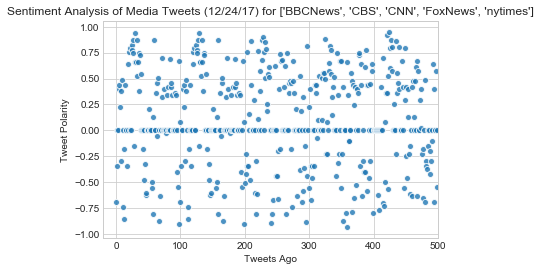

In [73]:
plt.scatter(np.arange(len(tweet_data["tweet_source"])), 
            tweet_data["tweet_vader_score"],
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.xlim([-20, 500])

# Save the figure
plt.savefig("../Social-Analytics-HW/Sentiment Analysis of Media Tweets.png")

# Show plot
plt.show()


In [74]:
# Target User
target_user = ["BBCNews","CBS","CNN","FoxNews","nytimes"]

# Loop through each user
for user in target_user:    

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []       
   
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

        # Store the Average Sentiments
    sentiments = {"User": user,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list)}
            
    # Print the Sentiments
    #print(sentiments)
    
    #Print Data Frame
    sentiments_pd = pd.DataFrame.from_dict(sentiments,orient='index')
    print(sentiments_pd)
    

                0
User      BBCNews
Compound -0.05129
Positive  0.08001
Neutral     0.118
Negative  0.80198
                 0
User           CBS
Compound  0.481761
Positive   0.19823
Neutral    0.01091
Negative   0.79089
                 0
User           CNN
Compound -0.071022
Positive   0.07024
Neutral    0.09573
Negative   0.83401
                0
User      FoxNews
Compound   0.1142
Positive  0.10445
Neutral   0.06277
Negative  0.83281
                 0
User       nytimes
Compound  0.006404
Positive   0.08355
Neutral    0.08455
Negative   0.83194


In [63]:
# Set x axis and tick locations
x_axis = np.arange(len(sentiments["User"]))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, sentiments["Compound"], alpha=0.5, align="edge")
plt.xticks(tick_locations, ["BBCNews","CBS","CNN","FoxNews","nytimes"])

# Sets the x limits of the chart
plt.xlim(-0.25, len(x_axis))

# Sets the y limits of the current chart
plt.ylim(0,max(sentiments["Compound"]+10))

# Give our chart some labels and a tile
plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")

# Print our chart to the screen
plt.show()


TypeError: object of type 'numpy.float64' has no len()